Change C_s_n_0 from 28544 -> 28800, need to change below 28540, to avoid first step error at Home PC
CV from C/20 -> C/50  
change pos critical stress to 2e9, to reduce LAM_pos and associtaed LLI

Refumulate ageing process to incoorpate dry-out  241020

In [1]:
# Load modules
import pybamm as pb;import pandas as pd;import numpy as np;
import os, json,openpyxl,traceback,multiprocessing,scipy.optimize,sys
import matplotlib.pyplot as plt;
import pickle,imageio,timeit,random,time, signal
from scipy.io import savemat,loadmat;
from pybamm import constants,exp;import matplotlib as mpl

# Global setting 
purpose_i = "Warwick_ageing"
rows_per_file = 1  
Scan_end_end = 12

# define options:
On_HPC =  False;        Runshort="War";    Add_Rest = False
Plot_Exp=True;          Timeout=True;     Return_Sol=True;   
Check_Small_Time=True;  R_from_GITT = False
fs = 14; dpi = 300; Re_No =0
Options = [ 
    On_HPC,Runshort,Add_Rest,
    Plot_Exp,Timeout,Return_Sol,
    Check_Small_Time,R_from_GITT,
    dpi,fs]
Timelimit = int(3600*12) # give 12 hours!

# Add path to system to ensure Fun_P2 can be used
if On_HPC:
    i_bundle = int(os.environ["PBS_ARRAY_INDEX"])
else:
    i_bundle = 5; 
Scan_start = (i_bundle-1)*rows_per_file+1;    
Scan_end   = min(Scan_start + rows_per_file-1, Scan_end_end)    
purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
Target  = f'/{purpose}/'
# interpetation: Simnon suggested, with cracking activation, heat transfer
para_csv = f"Bundle_{i_bundle}.csv"  # name of the random file to get parameters

# Path setting:
if On_HPC:                          # Run on HPC
    Path_csv = f"InputData/{purpose_i}/" 
    Path_Input = "InputData/" 
    BasicPath=os.getcwd() 
    Para_file = Path_csv +  para_csv
else:
    # Add path to system to ensure Fun_P2 can be used
    import sys  
    str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
    str_path_1 = os.path.abspath(
        os.path.join(str_path_0,"./PyBaMM/docs/source/examples/notebooks/models/Pressure_wip/Ruihe"))
    sys.path.append(str_path_1) 
    Path_Input = os.path.expanduser(
       "~/PyBaMM/docs/source/examples/notebooks/models/Pressure_wip/Ruihe/Get_Random_sets") # for Linux
    BasicPath =  os.path.expanduser(
       "~/PyBaMM/docs/source/examples/notebooks/models/Pressure_wip/Ruihe/Get_Random_sets")
    # Para_file = Path_Input+f'{purpose_i}/'+para_csv
    Para_file = Path_Input+f'/{purpose_i}.csv'


# import all functions 
from Fun_NC_Xinlei import * 

# Load input file
Para_dict_list = load_combinations_from_csv(Para_file)
pool_no = len(Para_dict_list) # do parallel computing if needed

midc_merge_all = [];  Sol_RPT_all = [];  Sol_AGE_all = []
Path_List = [BasicPath, Path_Input,Target,purpose] 

if Re_No == 0:
    midc_merge,Sol_RPT,Sol_AGE,DeBug_Lists = Run_P2_Excel (
        Para_dict_list[0], Path_List, 
        Re_No, Timelimit, Options) 
elif Re_No > 0:
    pass


## 需要调整RPT中的step号 match新的RPT done, 并且修改def Get_Output_Keys(Para_dict_i)中的soldict done
## 需要调整SoH初始值，以及cracking
## 为什么孔隙率增加了？或者是pore增大了



An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


总扫描案例数为 1
Start Now! Scan 0 Re 0
Exp: 10
T: 25
Aging T is 25degC
Has Overwritten Initial outer SEI thickness [m] to be 2.72e-08 and Negative electrode porosity to be 0.195 to account for initial capacity loss of 0.135 Ah
Scan 0 Re 0: DryOut = On
Initial electrolyte amount is  5.861515635344993 mL
Scan 0 Re 0: Spent 2.639 ms on Initialization


/usr/lib/python3.9/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.9/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
At t = 150.093 and h = 1.96876e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 150.086 and h = 3.62715e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 118.823 and h = 7.6234e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 118.823 and h = 2.45502e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 118.823 and h = 8.37007e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 58.8223 and h = 3.3936e-15, the 


Succeed to run break in for the 0th time with capacity increase of 0Ah and perturbation of 0.00e+00Ah

Scan 0 Re 0: Finish break-in cycle within 2 minutes, 18 seconds
Scan 0 Re 0: Finish post-process for break-in cycle within 282.663 ms


At t = 190.138 and h = 1.0586e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 190.138 and h = 1.1911e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 70.1376 and h = 8.46728e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 117.739 and h = 1.31082e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 117.739 and h = 2.77422e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 117.739 and h = 5.67802e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 57.7391 and h = 7.17885e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 117.481 and h = 6.42409e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 117.481 and h = 1.12598e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 117.481 and h = 7.64027e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At

Succeed to run the ageing set for 10 cycles the 1th time
Scan 0 Re 0: Finish for No.0 ageing cycles within 8 minutes, 57 seconds
Scan 0 Re 0: Finish post-process for No.10 ageing cycles within 463.832 ms
Electrolyte is being squeezed out, check plated lithium (active and dead)


At t = 218.231 and h = 2.80396e-13, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 218.239 and h = 2.23497e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 115.538 and h = 2.1727e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 115.538 and h = 1.79919e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 115.537 and h = 3.24012e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 55.5367 and h = 1.71887e-15, the corrector convergence failed repeatedly or with |h| = hmin.


Succeed to run RPT for the 1th time
Scan 0 Re 0: Finish for No.10 RPT cycles within 2 minutes, 2 seconds
Scan 0 Re 0: Finish post-process for No.10 RPT cycles within 95.713 ms
Scan 0 Re 0: Getting extra variables within 87.611 us
Scan 0 Re 0: Finish all plots within 7.302 s
Scan 0 Re 0: Successfully save mat file!
Scan 0 Re 0: Try saving within 227.638 ms
Succeed doing something in 13 minutes, 26 seconds
This is the end of No. 0 scan, Re 0


In [3]:
import pybamm
model = pybamm.lithium_ion.DFN(
    {
        #"particle phases": ("2", "1"),
        #"open-circuit potential": (("single", "current sigmoid"), "single"),
        "open-circuit potential": "current sigmoid",
        "SEI": "solvent-diffusion limited",
        #"SEI": "interstitial-diffusion limited",
        "SEI porosity change": "true",
        "lithium plating": "partially reversible",
        "lithium plating porosity change": "true",  # alias for "SEI porosity change"
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "SEI on cracks": "true",
        "loss of active material": "stress-driven",
        "calculate discharge energy": "true",  # for compatibility with older PyBaMM versions

        "thermal": "lumped", 
    }
)



In [4]:
model.variables

{'Time [s]': Time(-0x3fafd19995bf406, time, children=[], domains={}),
 'Time [min]': Multiplication(0x1865690194059bd1, *, children=['0.016666666666666666', 'time'], domains={}),
 'Time [h]': Multiplication(-0x47f7767435debd16, *, children=['0.0002777777777777778', 'time'], domains={}),
 'x [m]': SpatialVariable(-0x41e2e26c58c72ef, x, children=[], domains={'primary': ['negative electrode', 'separator', 'positive electrode'], 'secondary': ['current collector']}),
 'x_n [m]': SpatialVariable(-0x5960ab66167d6566, x_n, children=[], domains={'primary': ['negative electrode'], 'secondary': ['current collector']}),
 'x_s [m]': SpatialVariable(-0x500d82a0f6e4da28, x_s, children=[], domains={'primary': ['separator'], 'secondary': ['current collector']}),
 'x_p [m]': SpatialVariable(0x446cc7fcc9bb449a, x_p, children=[], domains={'primary': ['positive electrode'], 'secondary': ['current collector']}),
 'r_n [m]': SpatialVariable(0x7d9bc80166f8cda0, r_n, children=[], domains={'primary': ['negative

In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
def Overwrite_Initial_L_SEI_0_Neg_Porosity(Para_0,cap_loss):
    """
    This is to overwrite the initial negative electrode porosity
    and initial SEI thickness (inner, outer) to be consistent
    with the initial capacity loss
    """
    delta_Q_SEI = cap_loss * 3600
    V_SEI = Para_0["Negative outer SEI partial molar volume [m3.mol-1]"]
    # do this when finish updating
    F = 96485.3
    A = Para_0["Electrode width [m]"] * Para_0["Electrode height [m]"]
    z_SEI = Para_0["Negative ratio of lithium moles to SEI moles"]
    L_neg = Para_0["Negative electrode thickness [m]"]
    eps_act_neg = Para_0["Negative electrode active material volume fraction"]
    R_neg =   Para_0["Negative particle radius [m]"]
    l_cr_init = Para_0["Negative electrode initial crack length [m]"]
    w_cr = Para_0["Negative electrode initial crack width [m]"]
    rho_cr = Para_0["Negative electrode number of cracks per unit area [m-2]"]
    a_neg = (3 * eps_act_neg / R_neg)
    roughness = 1 + 2 * l_cr_init * w_cr * rho_cr
    L_SEI_init = delta_Q_SEI  * V_SEI / (
        z_SEI * F * A * L_neg * a_neg * roughness)
 
    delta_epi = (L_SEI_init ) * roughness * a_neg
    L_inner_init = L_SEI_init / 2
    epi = 0.25 - delta_epi
    # print(L_inner_init,epi)
    # important: update here!
    Para_0["Negative electrode porosity"] = epi
    Para_0["Negative initial outer SEI thickness [m]"] = L_inner_init + 2.5e-9
    Para_0["Negative initial inner SEI thickness [m]"] = L_inner_init + 2.5e-9
    ## add Xinlei
    Para_0["Initial inner SEI thickness [m]"] = L_inner_init + 2.5e-9
    Para_0["Initial outer SEI thickness [m]"] = L_inner_init + 2.5e-9
    print(f"Has Overwritten Initial outer SEI thickness [m] to be {(L_inner_init+2.5e-9):.2e} and Negative electrode porosity to be {epi:.3f} to account for initial capacity loss of {cap_loss:.3f} Ah")
    print(f"Has Overwritten Initial outer SEI thickness [m] to be {(L_inner_init+2.5e-9):.2e} and Negative electrode porosity to be {epi:.3f} to account for initial capacity loss of {cap_loss:.3f} Ah")
 
    return Para_0

param = pybamm.ParameterValues("OKane2023_Xinlei")

Overwrite_Initial_L_SEI_0_Neg_Porosity(param,0.15)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Has Overwritten Initial outer SEI thickness [m] to be 1.62e-08 and Negative electrode porosity to be 0.219 to account for initial capacity loss of 0.150 Ah
Has Overwritten Initial outer SEI thickness [m] to be 1.62e-08 and Negative electrode porosity to be 0.219 to account for initial capacity loss of 0.150 Ah


{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': <function electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Constant at 0x7feefaad01f0>,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0.013,
 'Current function [A]': 5.0,
 'Dead lithium decay constant [s-1]': 1e-06,
 'Dead lithium decay rate [s-1]': <function SEI_limited_dead_lithium_OKane2022 at 0x7feefaac54c0>,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'EC partial molar volume [m3.mol-1]': 6.667e-05,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Constant at 0x7feefaad03a0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diff

In [7]:
print(param["Negative electrode partial molar volume [m3.mol-1]"])
print(param["Negative electrode critical stress [Pa]"])
param["Negative electrode critical stress [Pa]"] = 6e8
print(param["Negative electrode critical stress [Pa]"])

3.1e-06
60000000.0
600000000.0


In [8]:
print(param["Positive electrode partial molar volume [m3.mol-1]"])
print(param["Positive electrode critical stress [Pa]"])

7.88e-07
2000000000.0


In [9]:
print(param["Initial concentration in negative electrode [mol.m-3]"])
param["Initial concentration in negative electrode [mol.m-3]"] = 28600
print(param["Initial concentration in negative electrode [mol.m-3]"])


print(param["Initial concentration in positive electrode [mol.m-3]"])
param["Initial concentration in positive electrode [mol.m-3]"] = 13100
print(param["Initial concentration in positive electrode [mol.m-3]"])

28800
28600
12729.0
13100


In [10]:
print(param["Outer SEI solvent diffusivity [m2.s-1]"])
print(param["Positive outer SEI solvent diffusivity [m2.s-1]"])
print(param["Negative outer SEI solvent diffusivity [m2.s-1]"])

D_sol = 7e-21
param["Outer SEI solvent diffusivity [m2.s-1]"] = D_sol
param["Positive outer SEI solvent diffusivity [m2.s-1]"] = D_sol
param["Negative outer SEI solvent diffusivity [m2.s-1]"] = D_sol

print(param["Outer SEI solvent diffusivity [m2.s-1]"])
print(param["Positive outer SEI solvent diffusivity [m2.s-1]"])
print(param["Negative outer SEI solvent diffusivity [m2.s-1]"])

2.5000000000000002e-22
2.5000000000000002e-22
2.5000000000000002e-22
7e-21
7e-21
7e-21


In [11]:
print(param["Lithium plating kinetic rate constant [m.s-1]"])
print(param["Dead lithium decay constant [s-1]"])


k_Li = 1e-9
decay_Li = 1e-5

param["Lithium plating kinetic rate constant [m.s-1]"] = k_Li
param["Dead lithium decay constant [s-1]"] = decay_Li



1e-09
1e-06


In [79]:
# 从sol中计算循环过程中的容量，需要调整step如果换了工步
def calculate_capacities(sol):
    # 初始化充电容量和放电容量列表
    charge_capacities = []
    discharge_capacities = []

    # 遍历sol数据结构中的每个循环
    for cycle in sol.cycles:
        # 获取第一个步骤的放电容量时间序列
        step1_times = cycle.steps[0]["Discharge capacity [A.h]"].entries
        # 获取第二个步骤的放电容量时间序列
        step2_times = cycle.steps[1]["Discharge capacity [A.h]"].entries
        # 获取第三个步骤的放电容量时间序列
        step3_times = cycle.steps[2]["Discharge capacity [A.h]"].entries

        # 计算第一个步骤的初始值和第二个步骤的最后值的差（充电容量）
        charge_capacity = step2_times[-1] - step1_times[0]
        charge_capacities.append((-1) * charge_capacity)
        
        # 计算第三步的初始值和最后值的差（放电容量）
        discharge_capacity = step3_times[-1] - step3_times[0]
        discharge_capacities.append(discharge_capacity)

    # 返回计算结果
    return charge_capacities, discharge_capacities

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cwd = os.getcwd()


# 读取 pickle 文件
#pickle_file_path = cwd + '/docs/source/examples/notebooks/models/exp_LG/processed_data.pkl'
pickle_file_path = cwd + '/exp_LG/processed_data.pkl'
cycles_df = pd.read_pickle(pickle_file_path)
print("DataFrame loaded from pickle file")
print(cycles_df.head())


# 提取每个循环的最后一个 Q_dis 和 Q_cha 非零值
summary_data = []

for cycle in cycles_df.index.levels[0]:
    cycle_data = cycles_df.loc[cycle]
    last_q_dis = cycle_data[cycle_data['Q_dis'] > 0]['Q_dis'].iloc[-1] if not cycle_data[cycle_data['Q_dis'] > 0].empty else 0
    last_q_cha = cycle_data[cycle_data['Q_cha'] > 0]['Q_cha'].iloc[-1] if not cycle_data[cycle_data['Q_cha'] > 0].empty else 0
    summary_data.append([cycle, last_q_cha, last_q_dis])

# 创建一个新的 DataFrame 存储结果
summary_df = pd.DataFrame(summary_data, columns=['Cycle', 'Last_Q_cha', 'Last_Q_dis'])




DataFrame loaded from pickle file
            Mode  RelativeTime   Voltage          I  Q_dis     Q_cha  \
Cycle Step                                                             
1     1      1.0        0.0000  2.680430  1407.8055    0.0  0.000078   
      2      1.0        0.0084  2.690530  1574.4427    0.0  0.003691   
      3      1.0        0.0294  2.700598  1640.2499    0.0  0.013108   
      4      1.0        0.0634  2.710643  1664.4644    0.0  0.028749   
      5      1.0        0.1074  2.720645  1668.5892    0.0  0.049123   

                 Cap         R    Pressure  Temperature  
Cycle Step                                               
1     1     0.000078  1.903978  159.026607      25.3794  
      2     0.003691  1.708878  158.944819      25.3885  
      3     0.013108  1.646455  158.998347      25.4014  
      4     0.028749  1.628537  159.049016      25.4088  
      5     0.049123  1.630506  158.990980      25.4014  


In [ ]:
model = pybamm.lithium_ion.DFN(
    {
        #"particle phases": ("2", "1"),
        #"open-circuit potential": (("single", "current sigmoid"), "single"),
        "open-circuit potential": "current sigmoid",
        "SEI": "solvent-diffusion limited",
        #"SEI": "interstitial-diffusion limited",
        "SEI porosity change": "true",
        "lithium plating": "partially reversible",
        "lithium plating porosity change": "true",  # alias for "SEI porosity change"
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "SEI on cracks": "true",
        "loss of active material": "stress-driven",
        "calculate discharge energy": "true",  # for compatibility with older PyBaMM versions

        "thermal": "lumped", 
    }
)

#param = pybamm.ParameterValues("OKane2023_Xinlei")

var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator
    "x_p": 5,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 30,  # positive particle
}

cycle_number = 20
exp = pybamm.Experiment(
    # [
    #     "Hold at 4.2 V until C/100 (5 minute period)",
    #     "Rest for 4 hours (5 minute period)",
    #     "Discharge at 0.1C until 2.5 V (5 minute period)",  # initial capacity check
    #     "Charge at 1C until 4.2 V (5 minute period)",
    #     "Hold at 4.2 V until C/100 (5 minute period)",
    # ]
    # + 
    [
        (
            "Charge at C/3 until 4.2 V",
            "Hold at 4.2 V until C/20",
            "Discharge at 1C until 2.5 V",  # ageing cycles
            #"Discharge at 1C until 2.5 V"

        )
    ]
    * cycle_number
    #+ ["Discharge at 0.1C until 2.5 V (5 minute period)"],  # final capacity check
)

# exp = pybamm.Experiment(
#     [
#         "Hold at 4.2 V until C/100 (5 minute period)",
#         "Discharge at 0.1C until 2.5 V (5 minute period)",  # initial capacity check
#         "Charge at 0.1C until 4.2 V (5 minute period)",
#         "Hold at 4.2 V until C/100 (5 minute period)",
#     ]
# )


sim = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=var_pts )
#sim_thermal = pybamm.Simulation(model_thermal, parameter_values=param, experiment=exp, var_pts=var_pts)
sol = sim.solve(initial_soc=0)
#sol = sim.solve()


res failed: KeyboardInterrupt
At t = 0.777122, the residual function failed unrecoverably.
res failed: KeyboardInterrupt
At t = 357.694, the residual function failed unrecoverably.
At t = 227 and h = 6.23336e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 107 and h = 3.37862e-12, the corrector convergence failed repeatedly or with |h| = hmin.


In [82]:
model_RPT = model.set_initial_conditions_from(sol)
exp_RPT = pybamm.Experiment(
    [
        "Hold at 2.5 V for 1 hours",
        "Charge at 0.1C until 4.2 V",
        "Hold at 4.2 V until C/20",
        "Discharge at 0.1C until 2.5 V",
    ]
)

sim_RPT = pybamm.Simulation(model_RPT, parameter_values=param, experiment=exp_RPT, var_pts=var_pts )
sol_RPT_1 = sim_RPT.solve() 

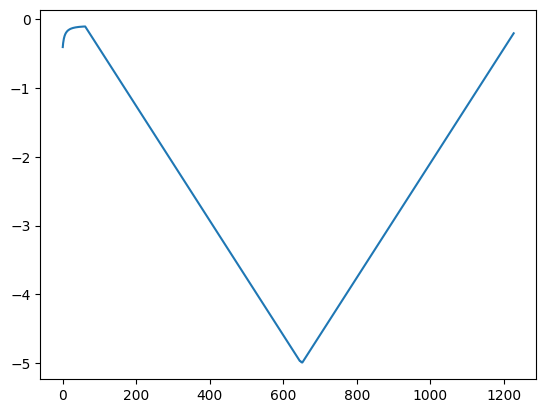

In [83]:
plt.plot(sol_RPT_1["Discharge capacity [A.h]"].entries)

In [84]:
model_RPT_0 = pybamm.lithium_ion.DFN(
    {
        #"particle phases": ("2", "1"),
        #"open-circuit potential": (("single", "current sigmoid"), "single"),
        "open-circuit potential": "current sigmoid",
        "SEI": "solvent-diffusion limited",
        #"SEI": "interstitial-diffusion limited",
        "SEI porosity change": "true",
        "lithium plating": "partially reversible",
        "lithium plating porosity change": "true",  # alias for "SEI porosity change"
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "SEI on cracks": "true",
        "loss of active material": "stress-driven",
        "calculate discharge energy": "true",  # for compatibility with older PyBaMM versions

        "thermal": "lumped", 
    }
)
exp_RPT_0 = pybamm.Experiment(
    [
        "Charge at 0.1C until 4.2 V",
        "Hold at 4.2 V until C/20",
        "Discharge at 0.1C until 2.5 V",
    ]
)
sim_RPT_0 = pybamm.Simulation(model_RPT_0, parameter_values=param, experiment=exp_RPT_0, var_pts=var_pts )
sol_RPT_0 = sim_RPT_0.solve(initial_soc=0)



In [85]:
Cap_RPT_0 =np.max(sol_RPT_0["Discharge capacity [A.h]"].entries) - \
            np.min(sol_RPT_0["Discharge capacity [A.h]"].entries)

print(Cap_RPT_0)

Cap_RPT_1st =np.max(sol_RPT_1["Discharge capacity [A.h]"].entries) - \
            np.min(sol_RPT_1["Discharge capacity [A.h]"].entries)

print(Cap_RPT_1st)

SOH = Cap_RPT_1st/Cap_RPT_0 * 100

print("SOH = ",SOH,"%")

4.994420458761124
4.888891289670962
SOH =  97.88705876965075 %


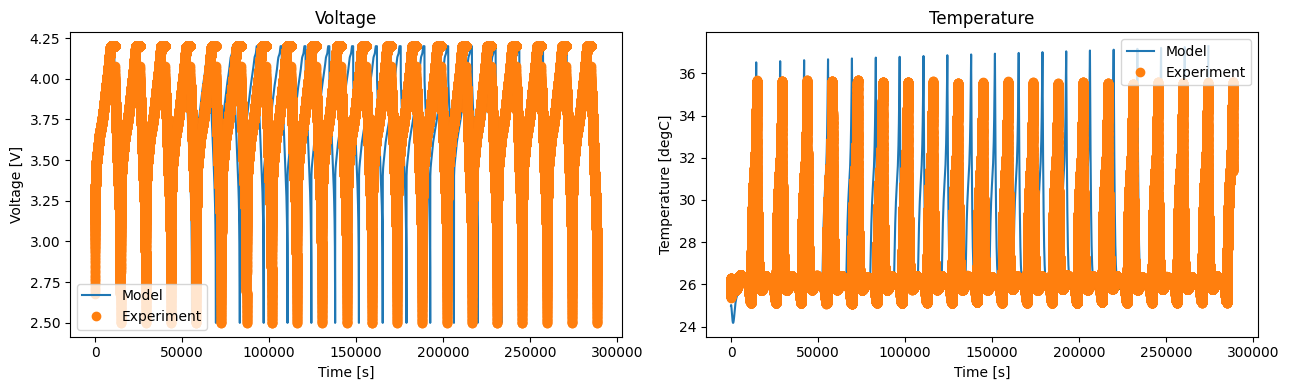

In [86]:
# 假设 `cycles_df` 是一个字典，其中的键是循环编号，每个键对应的值是包含该循环数据的DataFrame。

# 初始化空的DataFrame来存储合并后的电压和温度数据
merged_voltage = pd.DataFrame()
merged_temperature = pd.DataFrame()

# 初始化空的DataFrame来存储合并后的相对时间
merged_cycles_time = pd.DataFrame()

# 基准时间，从第一个循环的第一个数据点开始
base_time = cycles_df.loc[1]["RelativeTime"].iloc[0]

# 合并前20个循环
for i in range(1, 21):
    # 调整时间以基于第一个循环的起始时间
    adjusted_time = cycles_df.loc[i]["RelativeTime"] - base_time
    
    # 将调整后的时间添加到时间DataFrame中
    merged_cycles_time = pd.concat([merged_cycles_time, adjusted_time], ignore_index=True)
    
    # 将电压数据添加到电压DataFrame中
    merged_voltage = pd.concat([merged_voltage, cycles_df.loc[i]["Voltage"]], ignore_index=True)
    
    # 将温度数据添加到温度DataFrame中
    merged_temperature = pd.concat([merged_temperature, cycles_df.loc[i]["Temperature"]], ignore_index=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C results
t_sol = sol["Time [s]"].entries

ax1.plot(t_sol, sol["Voltage [V]"](t_sol))
ax1.plot(merged_cycles_time, merged_voltage, "o")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
ax1.set_title("Voltage")
ax1.legend(["Model", "Experiment"], loc="best")

ax2.plot(t_sol, sol["X-averaged cell temperature [C]"](t_sol))
ax2.plot(merged_cycles_time, merged_temperature, "o")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Temperature [degC]")
ax2.set_title("Temperature")
ax2.legend(["Model", "Experiment"], loc="best")

plt.tight_layout()
plt.show()

In [87]:
def calculate_capacities(sol):
    # 初始化充电容量和放电容量列表
    charge_capacities = []
    discharge_capacities = []

    # 遍历sol数据结构中的每个循环
    for cycle in sol.cycles:
        # 获取第一个步骤的放电容量时间序列
        step1_times = cycle.steps[0]["Discharge capacity [A.h]"].entries
        # 获取第二个步骤的放电容量时间序列
        step2_times = cycle.steps[1]["Discharge capacity [A.h]"].entries
        # 获取第三个步骤的放电容量时间序列
        step3_times = cycle.steps[2]["Discharge capacity [A.h]"].entries

        # 计算第一个步骤的初始值和第二个步骤的最后值的差（充电容量）
        charge_capacity = step2_times[-1] - step1_times[0]
        charge_capacities.append((-1) * charge_capacity)
        
        # 计算第三步的初始值和最后值的差（放电容量）
        discharge_capacity = step3_times[-1] - step3_times[0]
        discharge_capacities.append(discharge_capacity)

    # 返回计算结果
    return charge_capacities, discharge_capacities

# 假设 sol 已定义并包含需要的数据
# 调用函数并接收结果
charge_capacities, discharge_capacities = calculate_capacities(sol)

# 输出结果
print("充电容量:", charge_capacities)
print("放电容量:", discharge_capacities)


充电容量: [4.988784859662678, 4.665358179349636, 4.657800762144626, 4.651539805009249, 4.645979913553154, 4.640883721033312, 4.636123662604727, 4.631620996508692, 4.6273242695188435, 4.6231976228780045, 4.619211847684882, 4.615346941678305, 4.611558976472795, 4.607882877970522, 4.604285421310297, 4.600754051712687, 4.597283165365636, 4.593863811107403, 4.590490482250918, 4.587157866102878]
放电容量: [4.6654910155891915, 4.657909273515061, 4.651637938038404, 4.646072455786455, 4.640972892612421, 4.63621064743998, 4.631706716590045, 4.627409212799372, 4.623282150733794, 4.619296440549416, 4.615431762467743, 4.611644427675134, 4.607969119395185, 4.604372619918339, 4.600842498659896, 4.597373019762904, 4.59395507827289, 4.590583555442805, 4.58725270883022, 4.58395826203739]


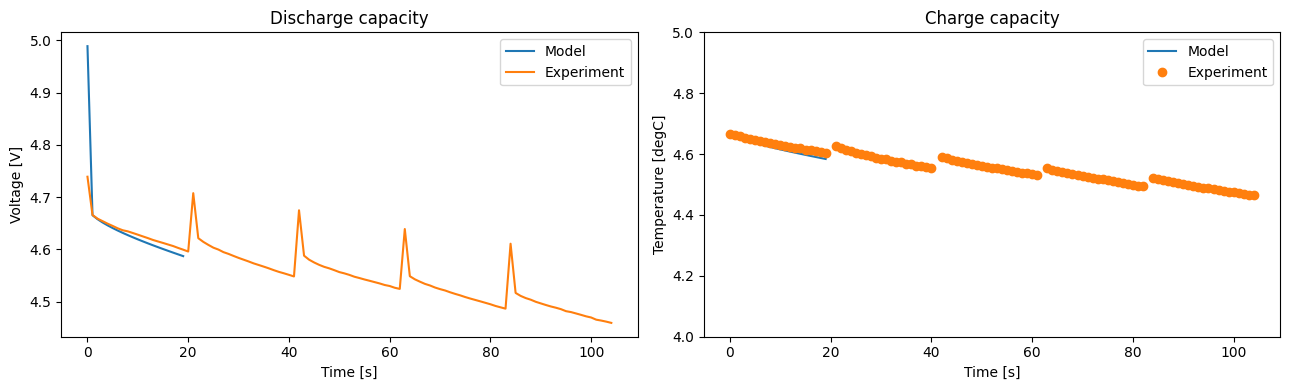

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C results
t_sol = sol["Time [s]"].entries

ax1.plot(charge_capacities)
ax1.plot(summary_df["Last_Q_cha"]/1000, )
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
ax1.set_title("Discharge capacity")
ax1.legend(["Model", "Experiment"], loc="best")

ax2.plot(discharge_capacities)
ax2.plot(summary_df["Last_Q_dis"]/1000, "o")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Temperature [degC]")
ax2.set_title("Charge capacity")
ax2.set_ylim(4,5)
ax2.legend(["Model", "Experiment"], loc="best")

plt.tight_layout()
plt.show()

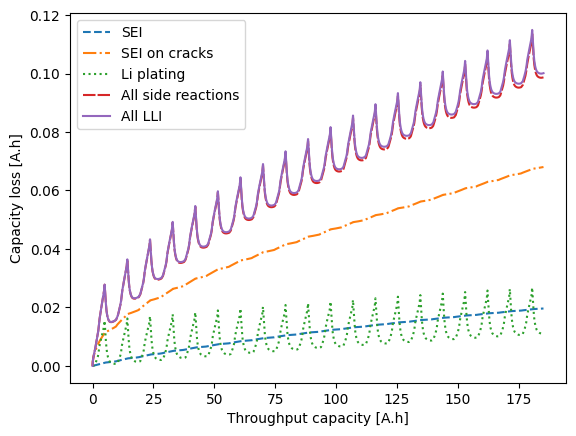

In [89]:
Qt = sol["Throughput capacity [A.h]"].entries
Q_SEI = sol["Loss of capacity to negative SEI [A.h]"].entries
Q_SEI_cr = sol["Loss of capacity to negative SEI on cracks [A.h]"].entries
Q_plating = sol["Loss of capacity to negative lithium plating [A.h]"].entries
Q_side = sol["Total capacity lost to side reactions [A.h]"].entries

#Q_particle = sol["Total lithium lost from particles [mol]"].entries * 96485.3 / 3600

Q_LLI = (
    sol["Total lithium lost [mol]"].entries * 96485.3 / 3600
)  # convert from mol to A.h

plt.figure()
plt.plot(Qt, Q_SEI, label="SEI", linestyle="dashed")
plt.plot(Qt, Q_SEI_cr, label="SEI on cracks", linestyle="dashdot")
plt.plot(Qt, Q_plating, label="Li plating", linestyle="dotted")
plt.plot(Qt, Q_side, label="All side reactions", linestyle=(0, (6, 1)))
#plt.plot(Qt,Q_particle,label = "Particle")
plt.plot(Qt, Q_LLI, label="All LLI")
plt.xlabel("Throughput capacity [A.h]")
#plt.xlim(0,25)
plt.ylabel("Capacity loss [A.h]")
#plt.ylim(0,0.03)
plt.legend()
plt.show()

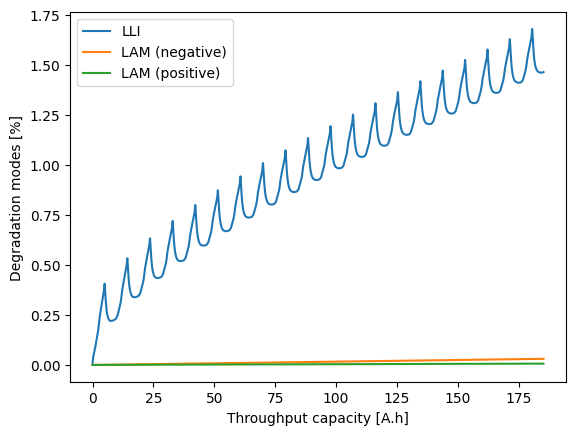

In [90]:
Qt = sol["Throughput capacity [A.h]"].entries
LLI = sol["Loss of lithium inventory [%]"].entries
LAM_neg = sol["Loss of active material in negative electrode [%]"].entries
LAM_pos = sol["Loss of active material in positive electrode [%]"].entries
plt.figure()
plt.plot(Qt, LLI, label="LLI")
plt.plot(Qt, LAM_neg, label="LAM (negative)")
plt.plot(Qt, LAM_pos, label="LAM (positive)")
plt.xlabel("Throughput capacity [A.h]")
plt.ylabel("Degradation modes [%]")
plt.legend()
plt.show()

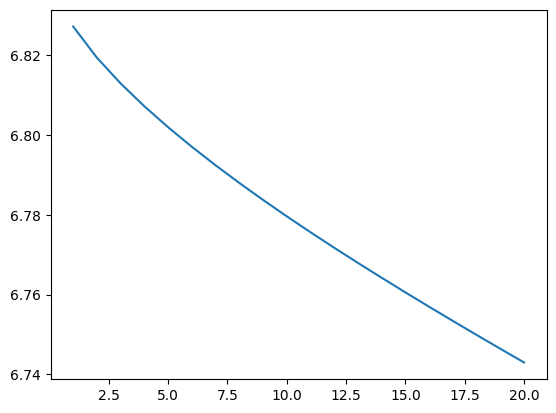

In [91]:
plt.plot(sol.summary_variables["Cycle number"],sol.summary_variables["Cyclable lithium capacity [A.h]"])


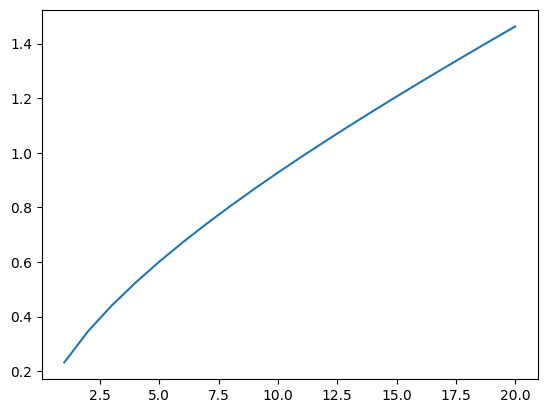

In [92]:
plt.plot(sol.summary_variables["Cycle number"],sol.summary_variables["Loss of lithium inventory [%]"])

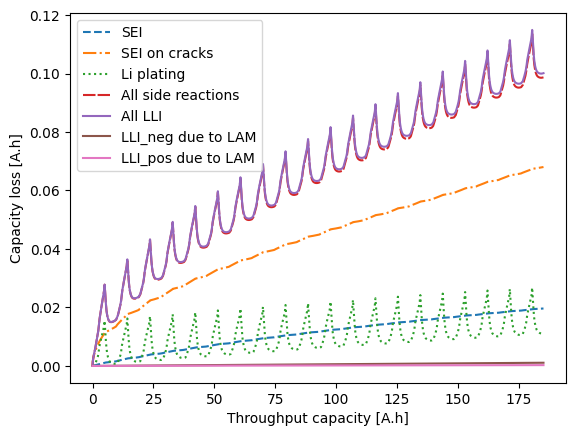

In [93]:
Qt = sol["Throughput capacity [A.h]"].entries
Q_SEI = sol["Loss of capacity to negative SEI [A.h]"].entries
Q_SEI_cr = sol["Loss of capacity to negative SEI on cracks [A.h]"].entries
Q_plating = sol["Loss of capacity to negative lithium plating [A.h]"].entries
Q_side = sol["Total capacity lost to side reactions [A.h]"].entries
Q_LLI = (
    sol["Total lithium lost [mol]"].entries * 96485.3 / 3600
)  # convert from mol to A.h

Q_LLI_due2_LAM_neg = (
    sol["Loss of lithium due to loss of active material in negative electrode [mol]"].entries * 96485.3 / 3600
)
Q_LLI_due2_LAM_pos = (
    sol["Loss of lithium due to loss of active material in positive electrode [mol]"].entries * 96485.3 / 3600
)
plt.figure()
plt.plot(Qt, Q_SEI, label="SEI", linestyle="dashed")
plt.plot(Qt, Q_SEI_cr, label="SEI on cracks", linestyle="dashdot")
plt.plot(Qt, Q_plating, label="Li plating", linestyle="dotted")
plt.plot(Qt, Q_side, label="All side reactions", linestyle=(0, (6, 1)))
plt.plot(Qt, Q_LLI, label="All LLI")
plt.plot(Qt, Q_LLI_due2_LAM_neg, label="LLI_neg due to LAM")
plt.plot(Qt, Q_LLI_due2_LAM_pos, label="LLI_pos due to LAM")
plt.xlabel("Throughput capacity [A.h]")
plt.ylabel("Capacity loss [A.h]")
plt.legend()
plt.show()

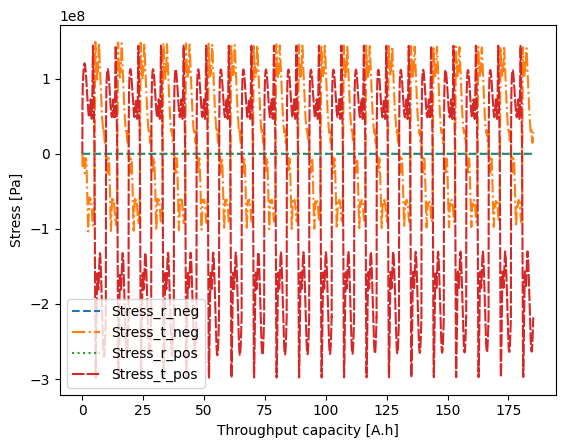

In [94]:
Qt = sol["Throughput capacity [A.h]"].entries
Stress_r_neg = sol["X-averaged negative particle surface radial stress [Pa]"].entries
Stress_t_neg = sol["X-averaged negative particle surface tangential stress [Pa]"].entries
Stress_r_pos = sol["X-averaged positive particle surface radial stress [Pa]"].entries
Stress_t_pos = sol["X-averaged positive particle surface tangential stress [Pa]"].entries
plt.figure()
plt.plot(Qt, Stress_r_neg, label="Stress_r_neg", linestyle="dashed")
plt.plot(Qt, Stress_t_neg, label="Stress_t_neg", linestyle="dashdot")
plt.plot(Qt, Stress_r_pos, label="Stress_r_pos", linestyle="dotted")
plt.plot(Qt, Stress_t_pos, label="Stress_t_pos", linestyle=(0, (6, 1)))

plt.xlabel("Throughput capacity [A.h]")
plt.ylabel("Stress [Pa]")
plt.legend()
plt.show()